In [3]:
from langgraph.graph import StateGraph, START, END 
from langchain_openai import ChatOpenAI 
from typing import TypedDict, Annotated 
from pydantic import BaseModel
from langchain_core.messages import BaseMessage, HumanMessage
from dotenv import load_dotenv
load_dotenv()       

True

In [5]:
from langgraph.graph.message import add_messages # acts as reducer
class ChatState(TypedDict):
    messages: Annotated[list[BaseMessage], add_messages]

In [6]:
llm = ChatOpenAI() 

def chat_node(state: ChatState):
    # Take user query from state 
    messages = state['messages']

    # sent to llm
    response = llm.invoke(messages)

    # Response store state
    return {'messages': [response]}

In [8]:
graph = StateGraph(ChatState)

graph.add_node("chat_node", chat_node) 

graph.add_edge(START, "chat_node")
graph.add_edge("chat_node", END)

chatbot = graph.compile()

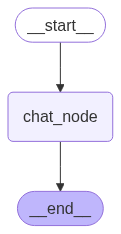

In [9]:
chatbot

In [10]:
initial_state = {'messages': [HumanMessage(content="What is the captial of india")]}

chatbot.invoke(initial_state)

{'messages': [HumanMessage(content='What is the captial of india', additional_kwargs={}, response_metadata={}, id='08a98006-57f5-415f-aa1b-ff7465b6fe3d'),
  AIMessage(content='The capital of India is New Delhi.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 14, 'total_tokens': 22, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-C0pr1GLAgQ8mMh7RnZs6BlC9VTqZS', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--3c92c325-ed91-4127-87ee-04303a2e9d11-0', usage_metadata={'input_tokens': 14, 'output_tokens': 8, 'total_tokens': 22, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [13]:
while True:
    user_message = input("Type here: ")
    print(f'User Message: {user_message}')

    if user_message.strip().lower() in ['exit', 'quit', 'bye']:
        break
    
    response = chatbot.invoke({'messages': [HumanMessage(content=user_message)]})   

    print(f"AI Message: {response['messages'][-1].content}")

User Message: Hello
AI Message: Hello! How can I assist you today?
User Message: My name is Hitesh
AI Message: Hello Hitesh! How can I assist you today?
User Message: What is my name ?
AI Message: I'm sorry, I am an AI assistant and I do not have access to your personal information such as your name.
User Message: What is 10 * 20
AI Message: 10 * 20 = 200
User Message: Now add 50 to it
AI Message: 1275
User Message: bye


## **Adding Memory to chatbot**

In [14]:
from langgraph.checkpoint.memory import MemorySaver 

checkpointer = MemorySaver()
graph = StateGraph(ChatState)

graph.add_node("chat_node", chat_node) 

graph.add_edge(START, "chat_node")
graph.add_edge("chat_node", END)

chatbot = graph.compile(checkpointer=checkpointer)

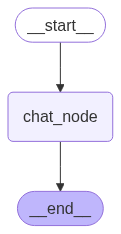

In [15]:
chatbot

In [ ]:
thread_id = "1"

while True:
    user_input = input("Enter you text: ")
    
    print(f"User Message: {user_input}")

    if user_input.strip().lower() in ["bye", "quit", "exit"]:
        break 

    config = {"configurable": {"thread_id": thread_id}}
    response = chatbot.invoke({'messages': [HumanMessage(content=user_input)]}, config=config)

    print("AI Message: ", response["messages"][-1].content)

User Message: Hi 
AI Message:  Hello! How can I assist you today?
User Message: My name is Hitesh
AI Message:  Nice to meet you, Hitesh! How can I help you today?
User Message: What is my name
AI Message:  Your name is Hitesh.
User Message: Can you suggest good username related to my name for instagram
AI Message:  Of course! Here are some Instagram username suggestions related to your name "Hitesh":
1. HiteshVibes
2. HiteshJourney
3. TheRealHitesh
4. HiteshInspires
5. Hitesh_Adventures
6. HiteshExplore
7. HiteshCreates
8. Hitesh_Wanderlust
9. HiteshChronicles
10. HiteshDreamer

I hope these suggestions help you find the perfect Instagram username!
User Message: Make joke with my name
AI Message:  Sure! Here's a light-hearted joke related to your name, Hitesh:

Why did Hitesh bring a ladder to the bar?

Because he heard the drinks were on the house! 

I hope that brought a smile to your face! Let me know if you want to hear more jokes or if there's anything else I can help you with.
Us

In [17]:
chatbot.get_state(config=config)

StateSnapshot(values={'messages': [HumanMessage(content='Hi ', additional_kwargs={}, response_metadata={}, id='aceff8da-a0a8-42a1-a5e1-dd561be8265e'), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 9, 'total_tokens': 18, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-C0qxvs0jO5UfC66vihGTahBkt3xoe', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--530c65ee-f503-4d5c-83fa-787306fefb47-0', usage_metadata={'input_tokens': 9, 'output_tokens': 9, 'total_tokens': 18, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), HumanMessage(content='My name is 